# Exploratory Data Analysis (EDA) Project  
Author: Kellie Leopold  
Date: February 4th, 2025  

This project was created to explore the well-known Iris dataset using a Jupyter Notebook for Data Analysis Fundamentals Module 4.

## Step 1. Imports  
Import the below for this project:  
1. pandas
2. Seaborn
3. matplotlib

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## Step 2. Load Data  
* Loaded the Iris dataset from the Seaborn Library.  
* Checked the first few lines of data to ensure they loaded correctly.  

The output of the first few rows shows: five columns with numerical data in the first four columns and categorical data in the fifth.

In [112]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 3. Initial Data Inspection  
* This dataset has 150 records of five attributes (sepal width, sepal lenght, petal width, petal length, and species) with well labeled columns.  
* The data types of the columns match with the expected data in that column.  
* There appears to be no missing values.

In [113]:
# Specify the number of rows to display
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Step 5a. Initial Data Distribution for Numerical Columns  
* Created histogram to show data on the sepal length.  
* Created multiple histograms to show data for all numerical columns in the dataset.  
* Show all plots.   

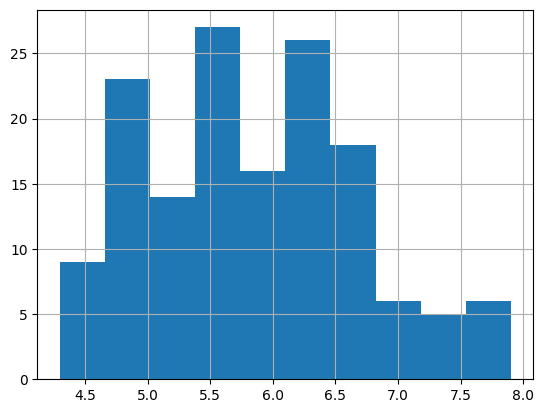

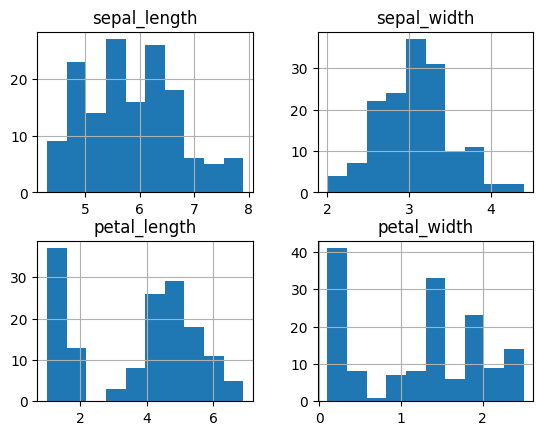

In [114]:
# Inspect histogram by one numerical column
iris_df['sepal_length'].hist()

# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
matplotlib.pyplot.show()

### Observation #1 
The first histogram shows only the data for the sepal lengths measured.  

The remaining histograms show the varying lengths and widths of the sepals and petals measured.  

It appears a larger sepal length and width typically equates to a smaller petal length and width and vice versa.

## Step 5b. Initial Data Distribution for Categorical Columns  
A histogram was created to show the record count for each Iris species in the species column, the only categorical column in the dataset.  

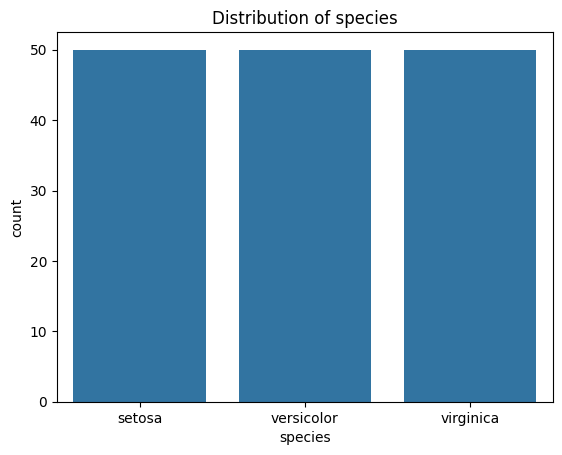

In [115]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
iris_df['species'].value_counts()

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

### Observation #2  

There are an equal amount of records (50 each) for three species of Iris flower (setosa, versicolor, and virginica) in the dataset, a total of 150 records.  